In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 読み込み
df0 = pd.read_csv(r"C:\Sumichika\WPC3_TF-IDF\data\score0.csv")
df1_5 = pd.read_csv(r"C:\Sumichika\WPC3_TF-IDF\data\score1-5.csv")
df_re1_5 = pd.read_csv(r"C:\Sumichika\WPC3_TF-IDF\data\re1_5.csv")
df_all = pd.read_csv(r"C:\Sumichika\WPC3_TF-IDF\data\all.csv")

In [4]:
# スコア抽出関数
def extract_score_series(df):
    score_columns = [col for col in df.columns if col.startswith("score_")]
    return pd.concat([df[col] for col in score_columns], ignore_index=True).dropna()

In [5]:
# 0.1刻みでカウント
bins = [i / 10 for i in range(11)] # [0.0, 0.1, ..., 1.0]
labels = [f"{round(bins[i],1)}-{round(bins[i+1],1)}" for i in range(len(bins)-1)]

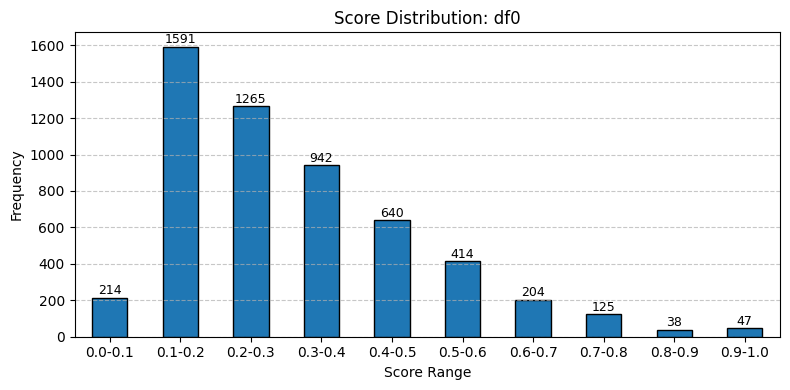

In [6]:
# score0のグラフ
scores0 = extract_score_series(df0)
score_bins0 = pd.cut(scores0, bins=bins, labels=labels, include_lowest=True)
counts0 = score_bins0.value_counts().sort_index()

plt.figure(figsize=(8, 4))
ax0 = counts0.plot(kind='bar', edgecolor='black')
plt.title("Score Distribution: df0")
plt.xlabel("Score Range")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 棒の上に値を表示
for i, val in enumerate(counts0):
    ax0.text(i, val + 2, str(val), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

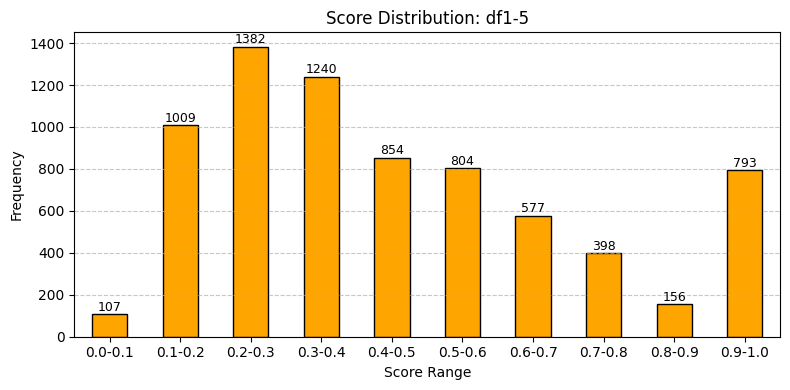

In [7]:
# score1-5のグラフ
scores1 = extract_score_series(df1_5)
score_bins1 = pd.cut(scores1, bins=bins, labels=labels, include_lowest=True)
counts1 = score_bins1.value_counts().sort_index()

plt.figure(figsize=(8, 4))
ax1 = counts1.plot(kind='bar', edgecolor='black', color='orange')
plt.title("Score Distribution: df1-5")
plt.xlabel("Score Range")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 棒の上に値を表示
for i, val in enumerate(counts1):
    ax1.text(i, val + 2, str(val), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

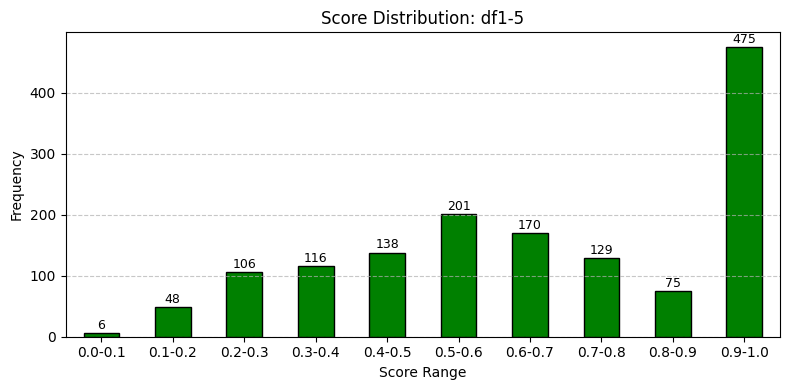

In [8]:
# score1-5のグラフ
scores2 = extract_score_series(df_re1_5)
score_bins2 = pd.cut(scores2, bins=bins, labels=labels, include_lowest=True)
counts2 = score_bins2.value_counts().sort_index()

plt.figure(figsize=(8, 4))
ax2 = counts2.plot(kind='bar', edgecolor='black', color='green')
plt.title("Score Distribution: df1-5")
plt.xlabel("Score Range")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 棒の上に値を表示
for i, val in enumerate(counts2):
    ax2.text(i, val + 2, str(val), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [9]:
# 全行
all_scores = extract_score_series(df_all)
all_bins = pd.cut(all_scores, bins=bins, labels=labels, include_lowest=True)
all_counts = all_bins.value_counts().sort_index()

In [10]:
# 当たりのみ
hit_scores = extract_score_series(df_re1_5)
hit_bins = pd.cut(hit_scores, bins=bins, labels=labels, include_lowest=True)
hit_counts = hit_bins.value_counts().sort_index()

In [11]:
hit_rate = (hit_counts / all_counts * 100).round(2)

In [12]:
result_df = pd.DataFrame({
    "total": all_counts,
    "hit": hit_counts,
    "hit_rate(%)": hit_rate
})
result_df

,total,hit,hit_rate(%)
0.0-0.1,321,6,1.87
0.1-0.2,2600,48,1.85
0.2-0.3,2647,106,4.00
0.3-0.4,2182,116,5.32
0.4-0.5,1494,138,9.24
0.5-0.6,1218,201,16.50
0.6-0.7,781,170,21.77
0.7-0.8,523,129,24.67
0.8-0.9,194,75,38.66
0.9-1.0,840,475,56.55


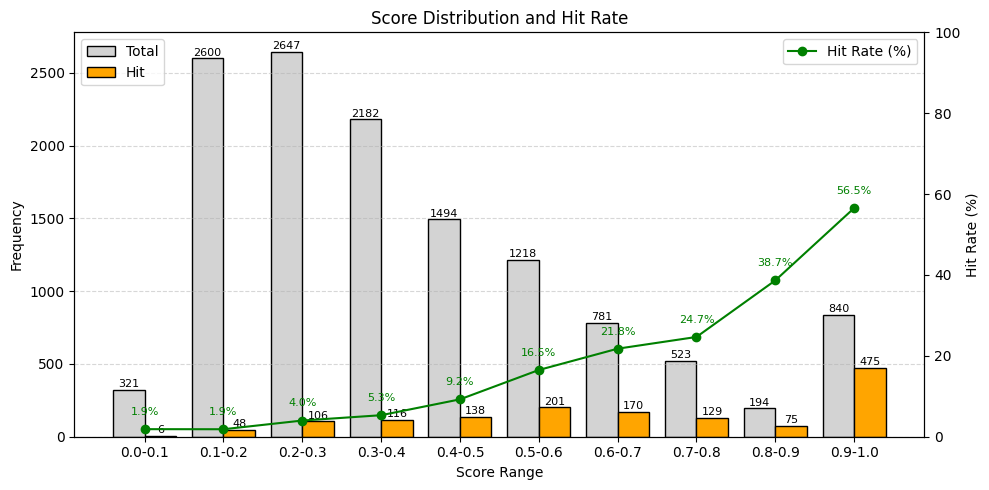

In [14]:
# スコア帯のラベル
x = result_df.index.tolist()
x_pos = range(len(x))
bar_width = 0.4

fig, ax1 = plt.subplots(figsize=(10, 5))

#  Total 棒グラフ
total_bars = ax1.bar(
    [i - bar_width/2 for i in x_pos],
    result_df["total"],
    width=bar_width,
    label="Total",
    color="lightgray",
    edgecolor="black"
)

#  Hit 棒グラフ
hit_bars = ax1.bar(
    [i + bar_width/2 for i in x_pos],
    result_df["hit"],
    width=bar_width,
    label="Hit",
    color="orange",
    edgecolor="black"
)

# 左軸（件数）
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Score Range")
ax1.set_xticks(x_pos)
ax1.set_xticklabels(x, rotation=0)
ax1.grid(axis="y", linestyle="--", alpha=0.5)
ax1.legend(loc="upper left")

#  Totalの上に件数表示
for bar in total_bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 5, f"{int(height)}", ha='center', va='bottom', fontsize=8)

#  Hitの上に件数表示
for bar in hit_bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 5, f"{int(height)}", ha='center', va='bottom', fontsize=8)

# 折れ線グラフ（右軸）
ax2 = ax1.twinx()
ax2.plot(x_pos, result_df["hit_rate(%)"], color="green", marker="o", label="Hit Rate (%)")
ax2.set_ylabel("Hit Rate (%)")
ax2.set_ylim(0, 100)
ax2.legend(loc="upper right")

#  折れ線の上に値表示
for i, rate in enumerate(result_df["hit_rate(%)"]):
    ax2.text(i, rate + 3, f"{rate:.1f}%", ha='center', va='bottom', fontsize=8, color="green")

plt.title("Score Distribution and Hit Rate")
plt.tight_layout()
plt.show()
